# Category Cleaning and Normalization

In this notebook, I explore and clean the `categories` column to reduce noise and improve interpretability. My goal is to standardize category names, group semantically similar entries, and prepare this feature for modeling.

I’ll inspect unique values, apply normalization, and create a grouped version (`category_group`) that captures high-level product types like skincare, haircare, and makeup.

In [ ]:
# Load cleaned dataset
import pandas as pd
df = pd.read_parquet("/content/cleaned_reviews.parquet")

In [ ]:
# Inspect unique categories
print(" Unique category samples:")
display(df['categories'].dropna().unique()[:30])

 Unique category samples:


array(['Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap',
       'Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes',
       'Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants',
       'Personal Care,Skin Care,Hand Cream,Beauty,Body Lotions & Creams,Natural Beauty,Natural Personal Care,Natural Skin Care,Ways To Shop,Bath & Body,Hand Creams & Lotions',
       'Personal Care,Bath, Shower & Soap,Featured Brands,Health & Beauty,Johnson & Johnson,Bath & Body,Body Wash & Cleansers,Beauty,Skin Care,Facial Cleansers,Soaps',
       'Personal Care,Baby Care,Baby Bubble Bath,Baby,Bath & Potty,Toiletries,Bubble Bath,Baby Bath,Bath & Body,Body Wash & Cleansers',
       'Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers',
       'Household Essentials,Cleaning Suppl

In [ ]:
print(f"\n Total unique categories: {df['categories'].nunique()}")


 Total unique categories: 77


In [ ]:
import numpy as np
def extract_main_category(cat_str):
    if pd.isna(cat_str):
        return np.nan
    return cat_str.split(',')[-1].strip().lower()

df['main_category'] = df['categories'].apply(extract_main_category)

In [ ]:
# Inspect unique main_category
print(" Unique main_category samples:")
display(df['main_category'].dropna().unique()[:30])

 Unique main_category samples:


array(['pop rap', 'cakes', 'lubricants', 'hand creams & lotions', 'soaps',
       'body wash & cleansers', 'creams & moisturizers', 'glass & window',
       'marinades & sauces', 'target restock',
       'color additives & fillers', 'daily shampoo', 'animation',
       'lotions', 'marzipan & almond paste', 'dish detergent',
       'bedding & blankets', 'keepsake frames', 'specialty stores',
       'sunscreen', 'car care & detailing', 'face', 'washes',
       'salon hair care', 'conventional foods', 'brushes',
       'mexican dishes', 'african american cinema', 'conditioners',
       'classroom cubbies & coat lockers'], dtype=object)

In [ ]:
print(f"\n Total unique main_category: {df['main_category'].nunique()}")


 Total unique main_category: 73


In [ ]:
category_map = {
    # Skincare
    'face': 'skincare',
    'lotions': 'skincare',
    'washes': 'skincare',
    'soaps': 'skincare',
    'creams & moisturizers': 'skincare',
    'sunscreen': 'skincare',
    'hand creams & lotions': 'skincare',

    # Haircare
    'shampoo': 'haircare',
    'daily shampoo': 'haircare',
    'conditioners': 'haircare',
    'salon hair care': 'haircare',

    # Makeup
    'lipstick': 'makeup',
    'foundation': 'makeup',
    'color additives & fillers': 'makeup',
    'bronzer': 'makeup',

    # Fragrance
    'perfume': 'fragrance',

    # Bodycare
    'body wash & cleansers': 'bodycare',
    'glass & window': 'bodycare',  # maybe reassign later
    'lubricants': 'bodycare',

    # Food
    'cakes': 'food',
    'marinades & sauces': 'food',
    'mexican dishes': 'food',
    'conventional foods': 'food',

    # Household
    'dish detergent': 'household',
    'brushes': 'household',
    'car care & detailing': 'household',

    # Entertainment
    'pop rap': 'entertainment',
    'animation': 'entertainment',
    'african american cinema': 'entertainment',

    # Home
    'bedding & blankets': 'home',
    'keepsake frames': 'home',
    'wall fixtures': 'home',

    # Other
    'target restock': 'other',
    'specialty stores': 'other',
}

In [ ]:
df['category_group'] = df['main_category'].map(category_map).fillna('other')

<Axes: title={'center': 'Grouped Category Frequencies'}, xlabel='category_group'>

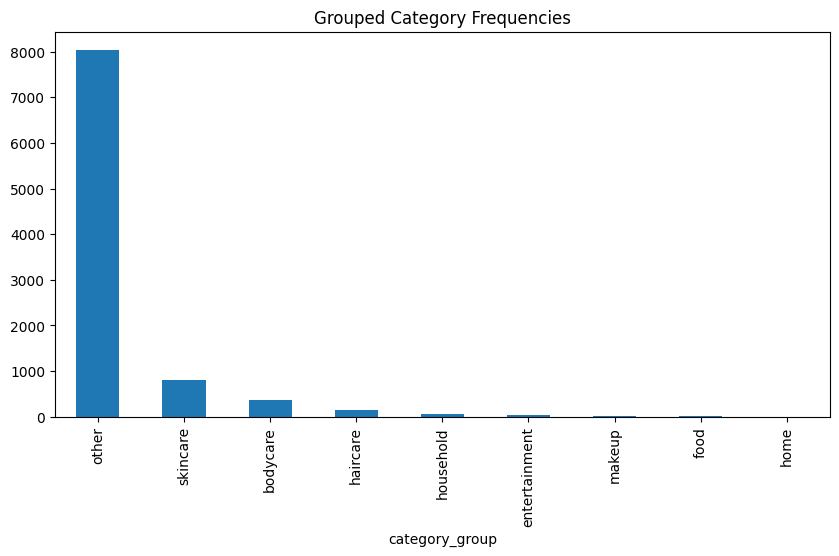

In [ ]:
group_counts = df['category_group'].value_counts()
group_counts.plot(kind='bar', figsize=(10, 5), title="Grouped Category Frequencies")

After extracting main_category and mapping it into broader semantic groups, I created the category_group feature. The distribution shows that most entries fall under "other", followed by "skincare", "bodycare", and "haircare". This confirms that the original categories field was highly granular and noisy, and that grouping helped reduce dimensionality while preserving interpretability.


In [ ]:
output_path = "/content/cleaned_reviews_with_categories.parquet"
df.to_parquet(output_path, index=False)
print("Saved enhanced dataset to:", output_path)

Saved enhanced dataset to: /content/cleaned_reviews_with_categories.parquet


I chose to retain all three category-related columns:

- `categories`: preserves the original raw tags for auditability
- `main_category`: captures the most specific tag per entry
- `category_group`: provides a simplified, interpretable grouping for modeling

This layered structure supports both traceability and flexibility in downstream analysis.